# Цель исследования: выявить для интернет-магазине «Стримчик», факторы определяющие успешность игр для планирования рекламной компании
    - оценить сколько игр выпускалось в разные годы
    - оценить динамику и структура продаж по жанрам и игровым платформам
    - проверить влияние оценки критиков на уровень продаж 
    - составить портрет пользователя для каждого региона (EU,NA,JAP)
    - провести оценку гипотез

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))
!pip install kaleido

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.express as px
from scipy import stats as st
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import kaleido

# Set notebook mode to work in offline
pyo.init_notebook_mode()
# import plotly.io as pio
# pio.kaleido.scope.default_format = "svg"

pd.set_option('display.float_format', lambda x: ('{:,.2f}'.format(x).replace(',',' ')))
sns.set_style("darkgrid")

In [3]:
data = pd.read_csv(r'C:\Users\Integro\Desktop\Обучение\YandexPracticum\Git Hub\games.csv') # запись csv в переменную

head_columns = data.columns.values.tolist() # переименование столбцов
head_columns = [x.lower() for x in head_columns]
data.columns = head_columns

## Оценка данных 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data = data.dropna(subset=['name'])# дропнем пару строк, они не несут релеванотной информации

In [6]:
rating_desc = pd.DataFrame({
    'rating': ['E','M','T','E10+','K-A','AO','EC','RP',np.nan], # ну и тут продолжить список
    'decryption': ['Для всех','Для взрослых','Подростки','Для всех от 10 лет и старше','Для детей и взрослых','Только для взрослых','Для детей младшего возраста','Рейтинг ожидается','Рейтинг не определен'] # ну и тут продолжить список
})
rating_desc

rating                   decryption
0      E                     Для всех
1      M                 Для взрослых
2      T                    Подростки
3   E10+  Для всех от 10 лет и старше
4    K-A         Для детей и взрослых
5     AO          Только для взрослых
6     EC  Для детей младшего возраста
7     RP            Рейтинг ожидается
8    NaN         Рейтинг не определен

In [7]:
# data.query('year_of_release>=2012').pivot_table(
#         index='rating', 
#         values = ['na_sales','eu_sales','jp_sales'], 
#         aggfunc='sum').reset_index().merge(rating_desc, on='rating', how='left')#.set_index('decryption')
data.merge(rating_desc, on='rating', how='left')

name platform  year_of_release         genre  \
0                         Wii Sports      Wii         2 006.00        Sports   
1                  Super Mario Bros.      NES         1 985.00      Platform   
2                     Mario Kart Wii      Wii         2 008.00        Racing   
3                  Wii Sports Resort      Wii         2 009.00        Sports   
4           Pokemon Red/Pokemon Blue       GB         1 996.00  Role-Playing   
...                              ...      ...              ...           ...   
16708  Samurai Warriors: Sanada Maru      PS3         2 016.00        Action   
16709               LMA Manager 2007     X360         2 006.00        Sports   
16710        Haitaka no Psychedelica      PSV         2 016.00     Adventure   
16711               Spirits & Spells      GBA         2 003.00      Platform   
16712            Winning Post 8 2016      PSV         2 016.00    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45         76.00          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29         82.00        8.3   
3         15.61     10.93      3.28         2.95         80.00          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16708      0.00      0.00      0.01         0.00           NaN        NaN   
16709      0.00      0.01      0.00         0.00           NaN        NaN   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.01      0.00      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   

      rating            decryption  
0          E              Для всех  
1        NaN  Рейтинг не определен  
2          E              Для всех  
3          E              Для всех  
4        NaN  Рейтинг не определен  
...      ...                   ...  
16708    NaN  Рейтинг не определен  
16709    NaN  Рейтинг не определен  
16710    NaN  Рейтинг не определен  
16711    NaN  Рейтинг не определен  
16712    NaN  Рейтинг не определен  

[16713 rows x 12 columns]

In [8]:
data

name platform  year_of_release         genre  \
0                         Wii Sports      Wii         2 006.00        Sports   
1                  Super Mario Bros.      NES         1 985.00      Platform   
2                     Mario Kart Wii      Wii         2 008.00        Racing   
3                  Wii Sports Resort      Wii         2 009.00        Sports   
4           Pokemon Red/Pokemon Blue       GB         1 996.00  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3         2 016.00        Action   
16711               LMA Manager 2007     X360         2 006.00        Sports   
16712        Haitaka no Psychedelica      PSV         2 016.00     Adventure   
16713               Spirits & Spells      GBA         2 003.00      Platform   
16714            Winning Post 8 2016      PSV         2 016.00    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45         76.00          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29         82.00        8.3   
3         15.61     10.93      3.28         2.95         80.00          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16713 rows x 11 columns]

## Подготовка и оценка данных


### Добавление общей суммы продаж

In [9]:
# data ['world_sales'] = data.loc[:,'na_sales':'other_sales'].sum(axis=1)
data['world_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1) #сумма продаж по миру

### Динамика  выпущенных игр в разные годы

In [10]:
release_game = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index().astype('int16')

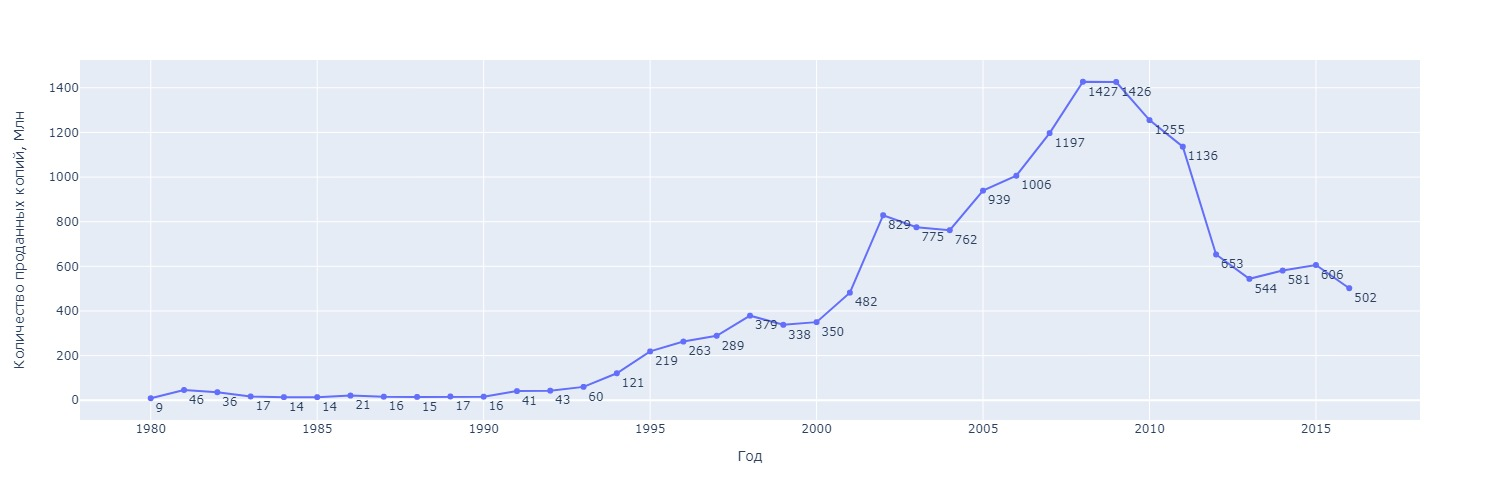

In [11]:
fig = px.line(release_game, x="year_of_release", y="name", text = "name",width=1500, height=500,
             labels=dict(year_of_release ="Год", name="Количество проданных копий, Млн"))
fig.update_traces(textposition="bottom right")

fig.show('jpeg')

**Вывод:** С развитием ЭВМ и адаптированием первых операционных систем(1990-2000), наблюдается развитие производства компьютерных игр. Появление интернета, дает еще более массовый скачек в развитии игровой индустрии, наблюдается  линейный рост. Продолжающаяся с 2000 года цифровая революция приносит развитие мобильной связи, а вместе с этим добавляет количество выпущенных игр для мобильных консолей. Начиная с 2008 г. происходит развитие мобильных операционных систем Android и iOS, создатели игр начали фокусировать внимание на данном рынке, что в 2008-2013 приводит к падению рынка производства тайтлов видеоигр для мобильных  консолей. В 2013-2016 на рынке остаются производители платформ с более требоваательные к "железу". Доминирующие позиции достаются компаниям Sony и Microsoft.

### Динамика продаж по жанрам за весь период существования индустрии видеоигр
- определим платформы с наибольшими суммарными продажами 
- постройте распределение по годам
- определим характерный срок появляются новые и исчезают старые платформы


In [12]:
genre_world_sales = data.dropna(subset=['year_of_release']).pivot_table(index = ['year_of_release','genre'], values = 'world_sales', aggfunc = 'sum').reset_index()
genre_world_sales['year_of_release']=genre_world_sales['year_of_release'].astype('int16')
# дропнем отсутсвующие года примерно 1.5% данных и изменим тип данных
genre_2012_2016year_world_sales = genre_world_sales.query('year_of_release>=2012')

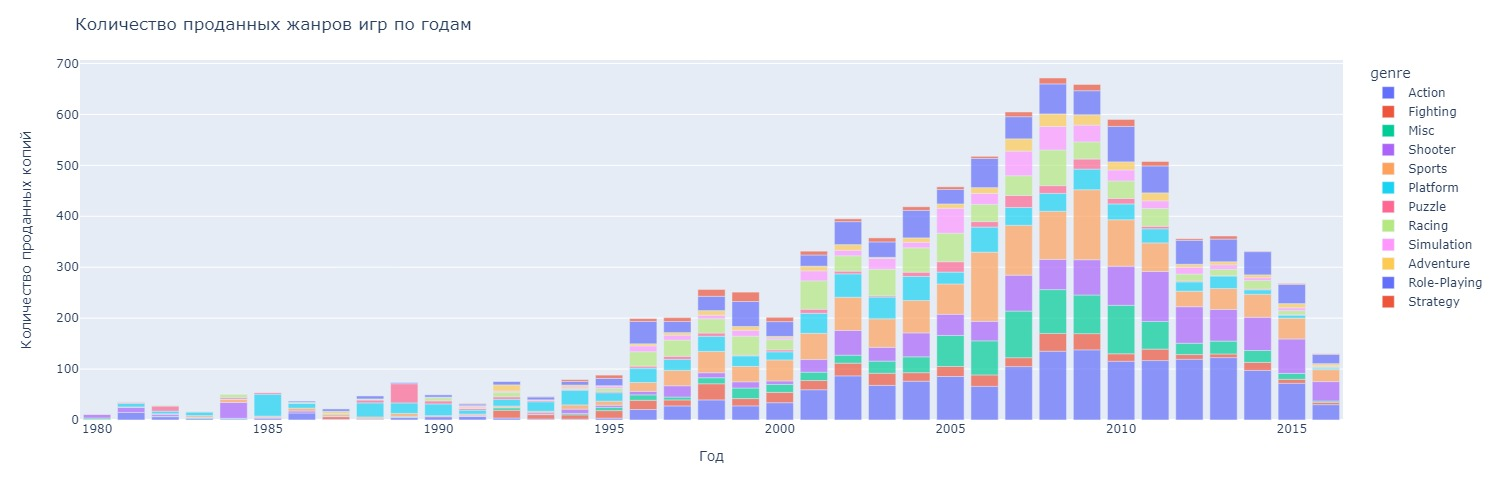

In [13]:
fig = px.bar(genre_world_sales,x ='year_of_release', y = 'world_sales', color = 'genre',opacity=0.7,width=1500, height=500,
             labels=dict(year_of_release ="Год", world_sales="Количество проданных копий"))
fig.update_layout(title_text="Количество проданных жанров игр по годам")
fig.show('jpeg')

**Вывод:** в период 1995- 2014 происходит расцвет эпохи жанров. Но не все смогли удержаться и пройти испытание временем. Жанр Misc, претерпел свои лучшие годы в  2005-2011 и к  2016 сошел на нет. А вот жанр Adventure, также был популярен в эти года, но все же смог устоять. Хоть и к 2016 году и произошло сужение рынка видео игр, но такие жанры как RPG,Shooter, Sport, Action остаются интересными и по сей день.

### Структура продаж по жанрам

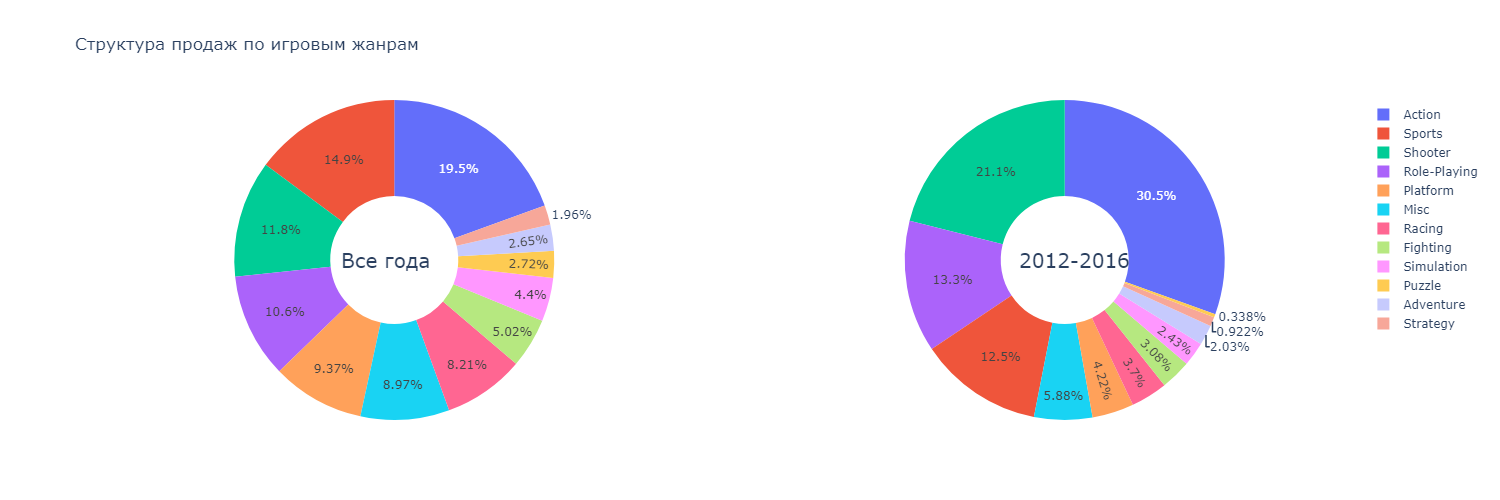

In [14]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(
     values=genre_world_sales['world_sales'],
     labels=genre_world_sales['genre'],
     domain=dict(x=[0, 0.5]),
#      title="Структура продаж за все года",
     name="Структура продаж в разбивке по игровым жанрам за все года"), 
     row=1, col=1)

fig.add_trace(go.Pie(
    values=genre_2012_2016year_world_sales['world_sales'],
    labels=genre_2012_2016year_world_sales['genre'], 
    domain=dict(x=[0.5, 1.0]),
#     title="Структура продаж за 2010-2016",
    name="Структура продаж в разбивке по жанрам за все 2012-2016"),
    row=1, col=2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(width=1500, height=500,
    title_text="Структура продаж по игровым жанрам",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Все года', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='2012-2016', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.show("png")

**Вывод:** Шутеры и экшен в наше время занимают половину рынка, нестареющие РПГ и спортивные игры с их долей рынка в 10-13% показывают стабильность, проверенную поколениями. Все остальные жанры подсдали и потеряли свои позиции в гонке за лидерство в жанре игровой индустрии компьютерных игр.

### Оценка динамики продаж на игровых платформах

In [15]:
platform_year_sales = data.dropna(subset=['year_of_release']).pivot_table(index = ['year_of_release','platform'], values = 'world_sales', aggfunc = 'sum').reset_index()


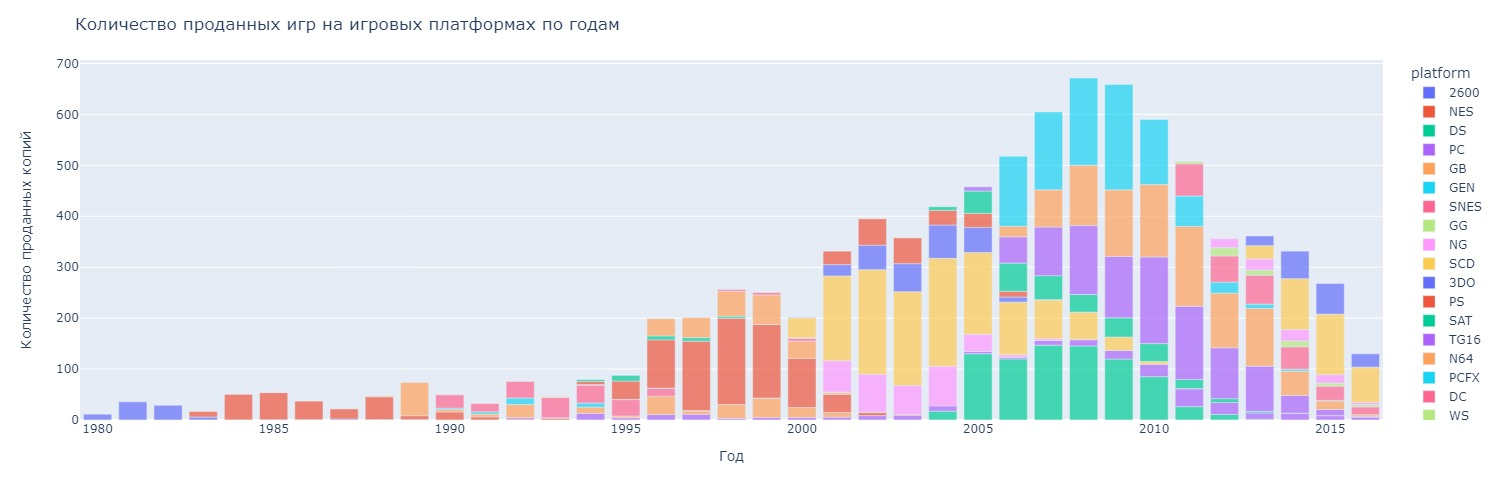

In [16]:
fig = px.bar(platform_year_sales,x ='year_of_release', y = 'world_sales', color = 'platform',opacity=0.7,width=1500, height=500,
             labels=dict(year_of_release ="Год", world_sales="Количество проданных копий"))
fig.update_layout(title_text="Количество проданных игр на игровых платформах по годам")
fig.show('jpeg')

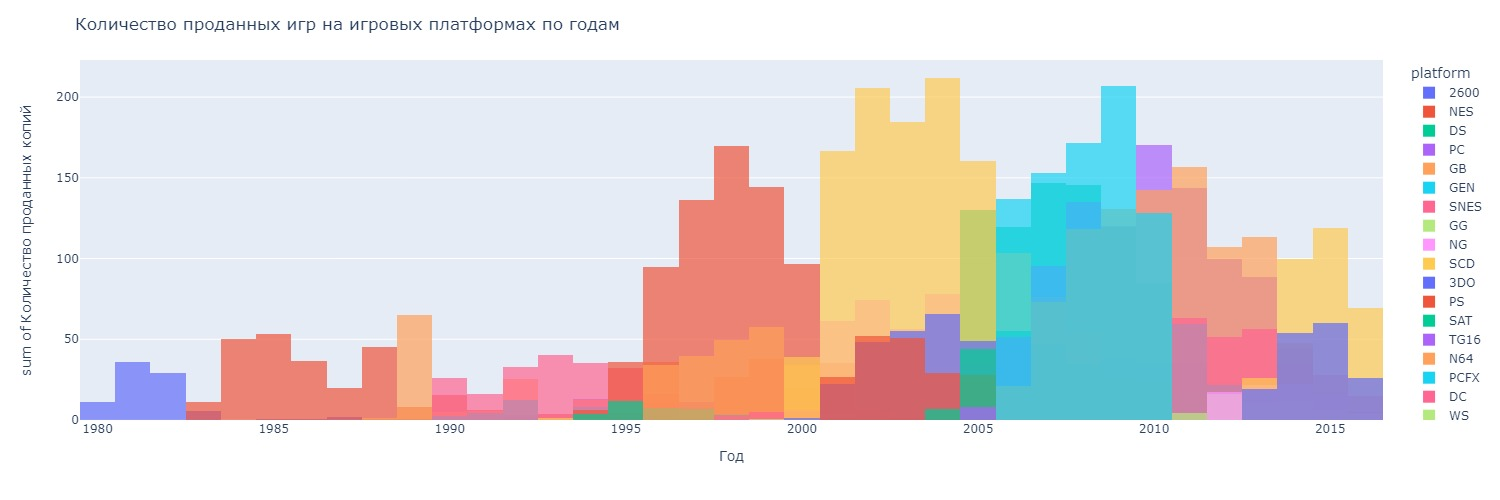

Wall time: 624 ms


In [17]:
%%time
fig = px.histogram(platform_year_sales, x="year_of_release",y="world_sales",histfunc='sum', color = 'platform', nbins=45,opacity=0.7,width=1500, height=500,
                   labels=dict(year_of_release ="Год", world_sales="Количество проданных копий"))
fig.update_layout(barmode='overlay', title_text="Количество проданных игр на игровых платформах по годам")
fig.show("jpeg")

**Вывод:** Очевидно , что под каждый технологический цикл, который длится , примерно, в течение 5 лет создавались игровые платформы, которые отвечали стандартам того времени. Что-то появлялось, а что -то оставалось за бортом времени. Более подробно о структуре ниже в пайчарте.

### Структура продаж по игровым платформам

In [18]:
platform_all_year_sales = data.pivot_table(index = ['platform'], values = 'world_sales', aggfunc = 'sum').reset_index()
genre_2012_2016year_world_sales = platform_year_sales.query('year_of_release>=2012')
# platform_year_sales_top5=platform_year_sales.assign(percent_of_sale=lambda x: x/x.sum()).sort_values(['world_sales'],ascending=False).head(5)

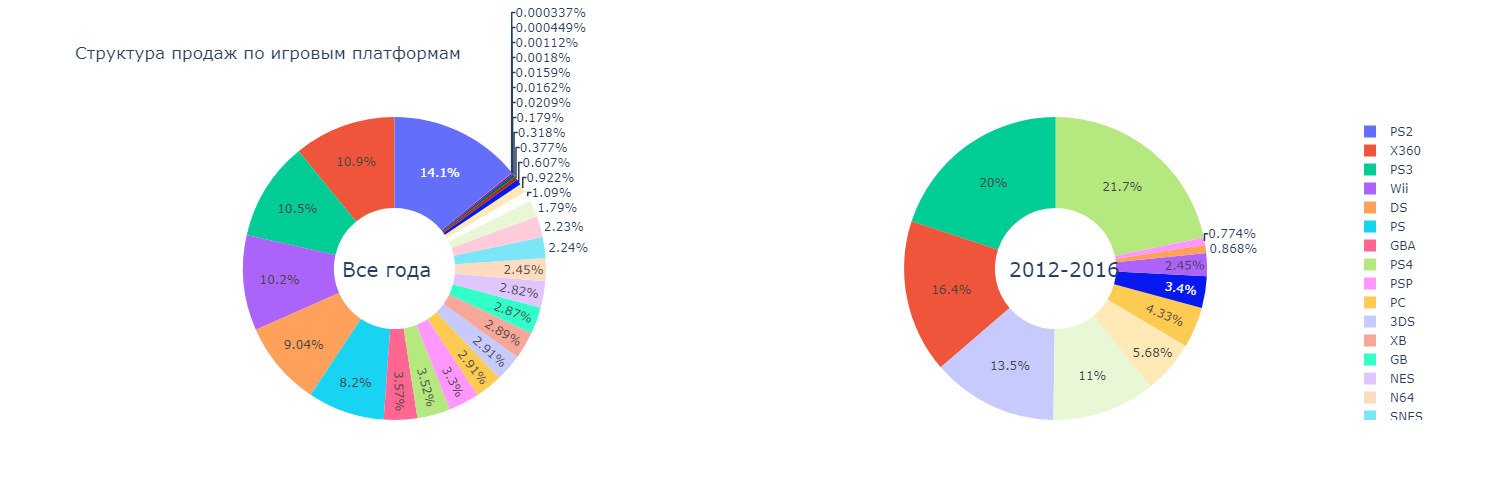

In [19]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(
     values=platform_all_year_sales['world_sales'],
     labels=platform_all_year_sales['platform'],
     domain=dict(x=[0, 0.5]),
#      title="Структура продаж за все года",
     name="Структура продаж в разбивке по игровым платформам за все года"), 
     row=1, col=1)

fig.add_trace(go.Pie(
    values=genre_2012_2016year_world_sales['world_sales'],
    labels=genre_2012_2016year_world_sales['platform'], 
    domain=dict(x=[0.5, 1.0]),
#     title="Структура продаж за 2010-2016",
    name="Структура продаж в разбивке по игровым платформам за все 2012-2016"),
    row=1, col=2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(width=1500, height=500,
    title_text="Структура продаж по игровым платформам",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Все года', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='2012-2016', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.show("png")

**Вывод:** лидирующую позицию 2010-2015 занимает компания Sony с 3-м и 4-м поколением своих консолей PlayStation. Что в прошлом, что и сейчас компания Sony, так сказать "на коне", а компания Microsoft с их Xbox360 также занимает значительную долю рынка, PC что - то совсем отстаёт. Японская Nintendo с их 3DS, также популярна с учетом роста мобильных игровых платформ.

### Анализ глобальных продажм игр в разбивке по платформам с использованием графика «ящик с усами».


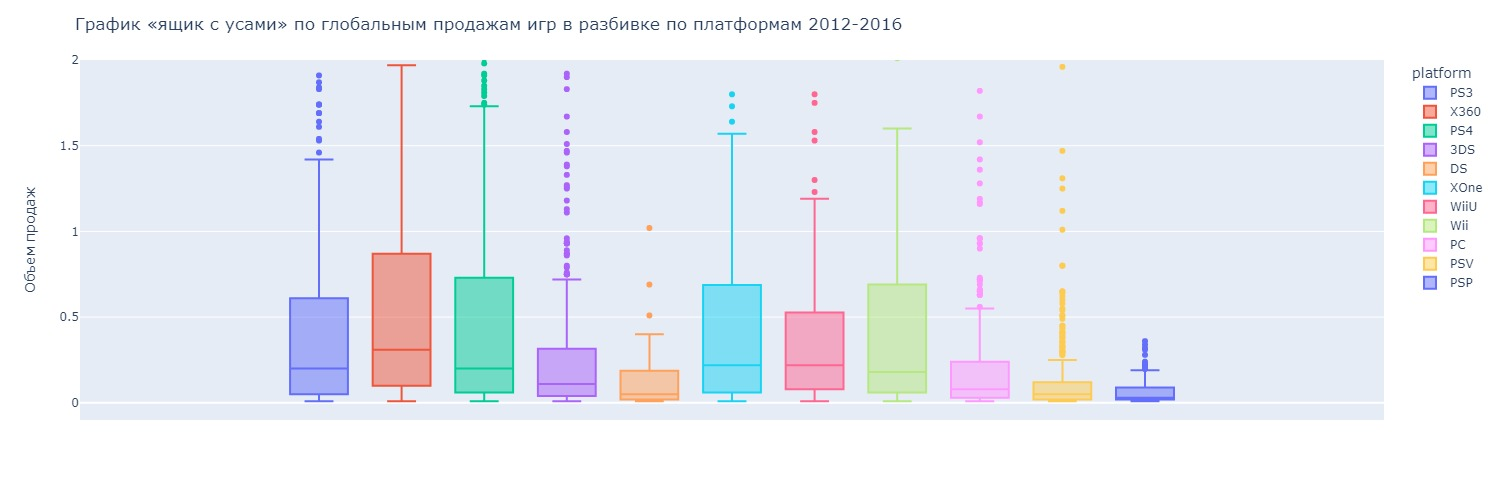

In [20]:
platform_ws = data[['platform','world_sales','year_of_release']].query('year_of_release>=2012' )
fig = px.box(platform_ws, y="world_sales", color="platform",width=1500, height=500,
                   labels=dict(world_sales="Объем продаж ", year_of_release="Год"))
fig.update_layout(title_text="График «ящик с усами» по глобальным продажам игр в разбивке по платформам 2012-2016",yaxis_range = [-0.1,2])
fig.show('jpeg')

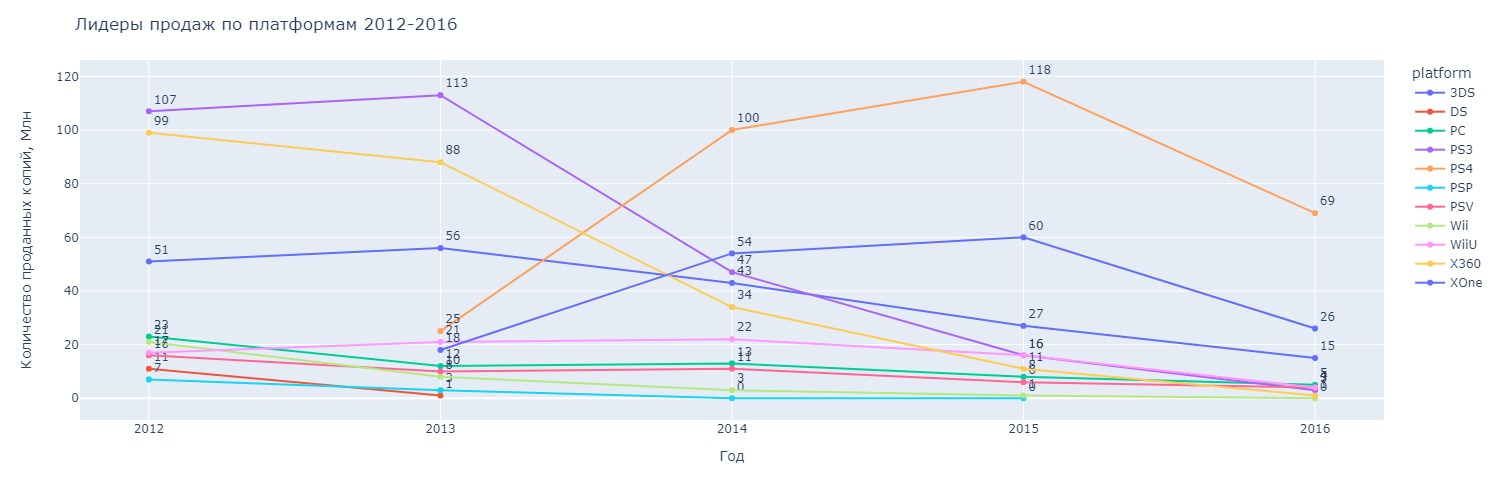

In [21]:
platform_ws_2012_2016 = data.dropna(subset=['year_of_release']).pivot_table(index = ['platform','year_of_release'], values = 'world_sales', aggfunc = 'sum').reset_index()
platform_ws_2012_2016['year_of_release']=platform_ws_2012_2016['year_of_release'].astype('int16')
platform_ws_2012_2016['world_sales']=platform_ws_2012_2016['world_sales'].astype('int')
platform_2012_2016_year_world_sales = platform_ws_2012_2016.query('year_of_release>=2012')
fig = px.line(platform_2012_2016_year_world_sales, x="year_of_release", y="world_sales",color='platform',text="world_sales",width=1500, height=500,
             labels=dict(year_of_release ="Год", world_sales="Количество проданных копий, Млн"))
fig.update_traces(textposition="top right")
fig.update_xaxes(dtick=1)
fig.update_layout(title_text="Лидеры продаж по платформам 2012-2016")
fig.show('jpeg')

**Вывод:** в последнем технологическом цикле выделяются лидеры  продаж это PS4, XOne. На них и стоит акцентировать внимание на формирование рекламной кампании.Хотя не за горами и следующий технологический цикл. Как видно из линейного графика все остальные платформы идут на спад. 2016 год не совсем нерепрезентативен по продажам так как год не полный и приведен справочно для понятия трендов.  Необходимо учитывать медианные и средние значения для максимальной закупки копий видеоигр.

### Анализ зависимости оценки критиков  и пользователей на уровень продаж

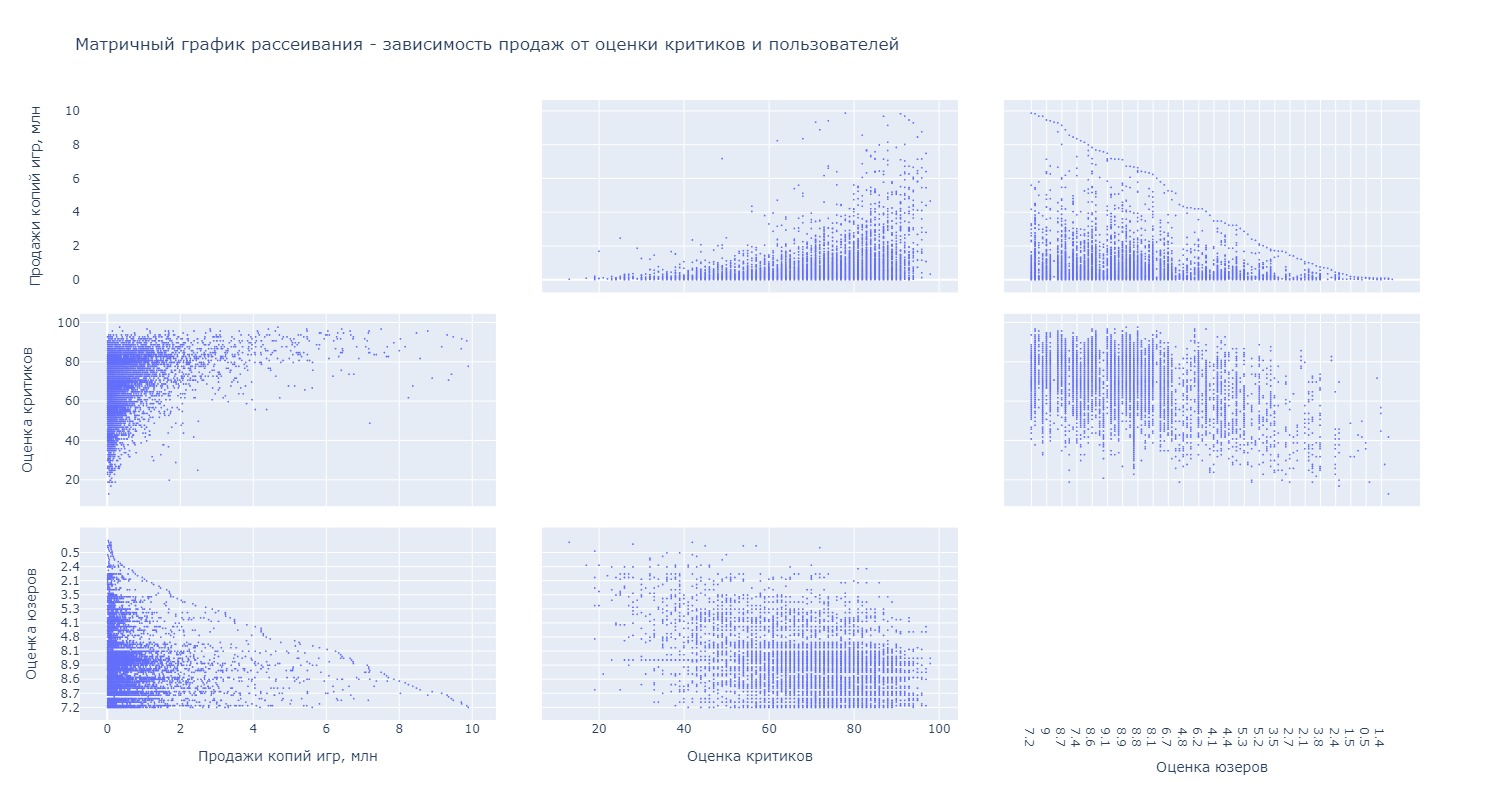

In [22]:
fig = px.scatter_matrix(data[["world_sales", "critic_score", "user_score"]].query('world_sales<10') ,width=1500, height=800,
    dimensions=["world_sales", "critic_score", "user_score"],
    title="Матричный график рассеивания - зависимость продаж от оценки критиков и пользователей ",
    labels=dict(world_sales ="Продажи копий игр, млн", critic_score="Оценка критиков",user_score= "Оценка юзеров")                    
    )
                    
fig.update_traces(diagonal_visible=False,marker_size=2)
fig.show('jpeg')

#### Распределение продаж по кому была дана оценка критиков

In [23]:
def rating_critic(score):

    if 0.1<=score < 20:
        return '0-20'
    elif 20 <= score < 40:
        return '20-40'
    elif 40 <= score < 60:
        return '40-60'
    elif 60 <= score < 80:
        return '60-80'
    elif 80 <= score <= 100:
        return '80-100'
    elif  score != score: # NAN - классифицирован, как рейтинг не определен.
        return 'Рейтинг не определен' 

In [24]:
data['rating_critic'] = data['critic_score'].apply(rating_critic)

In [25]:
# data['qvintil_cut_critic_score'] = pd.qcut(data.critic_score,5,['13-58','58 -67','67-74','74-81','81-98'])
data.pivot_table(index = 'rating_critic', values = 'world_sales' , aggfunc = 'sum').assign(percent =lambda x: x['world_sales']/x['world_sales'].sum()
                                                                                 ).style.background_gradient(axis=0,cmap='YlGn', subset = 'percent'
                                                                                                            ).format({'percent': '{:.2%}'})   

#### Распределение продаж по кому была дана оценка пользователей

In [26]:
def rating_user(score):

    if score == 0:
        return 'Рейтинг не определен'
    elif 0.1<=score < 2:
        return '0-2'
    elif 2 <= score < 4:
        return '2-4'
    elif 4 <= score < 6:
        return '4-6'
    elif 6 <= score < 8:
        return '6-8'
    elif 8 <= score <= 10:
        return '8-10'
    elif  score != score:
        return 'Рейтинг не определен'# NAN - классифицирован, как рейтинг не определен.


In [27]:
data['rating_user'] = data['user_score'].replace('tbd',0).astype(float).apply(rating_user) # tbd(to be determinaded) - классифицирован, как рейтинг не определен.

In [28]:
# data.user_score = data.user_score.replace('tbd',np.nan).astype('float')
# data['qvintil_cut_user_score'] = pd.qcut(data.user_score,5,['0-6.1','6.1-7.1','7.1-7.8','7.8-8.3','8.3-9.7'])
data.pivot_table(index = 'rating_user', values = 'world_sales' , aggfunc = 'sum').assign(percent =lambda x: x['world_sales']/x['world_sales'].sum()
                                                                                 ).style.background_gradient(axis=0,cmap='YlGn', subset = 'percent'
                                                                                                            ).format({'percent': '{:.2%}'})   


In [29]:
ws_cs_corr= data['world_sales'][data['world_sales']<10].corr(data['critic_score'])
ws_us_corr= data['world_sales'][data['world_sales']<10].corr(data['user_score'].replace('tbd',np.nan).dropna().astype('float'))
print('Коэффицинет Пирсона по оценке критиков {:.2%}'.format(ws_cs_corr))
print('Коэффицинет Пирсона по оценке пользователей {:.2%}'.format(ws_us_corr)) 

Коэффицинет Пирсона по оценке критиков 34.54%
Коэффицинет Пирсона по оценке пользователей 13.28%


**Вывод:** 
1. По графику  рассеивания видно, что чем выше оценка критиков или пользователей, тем выше уровень продаж. При формирование рекламной кампании необходимо ориентироваться на оценки критиков и пользователей. Высокие оценки дают более высокую вероятность дистрибуции компьютерных игр. Есть слабая линейная зависимость 0,34 между оценкой критиков и пользователей, но по характеру  графика , там больше экспоненциальная зависимость.
2. Игры без рейтинга заимают значительную часть продаж 37%
3. Все что ниже 6 баллов по оценке пользоватей, продается очень плохо. Аналогична и оценка критиков, все что ниже 60 баллов  может стать неликвидом.

## Анализ портрета пользователя для каждого региона

### Анализ популярных жанров

In [30]:
reg_pop_genre_sales = data.query('year_of_release >= 2012').pivot_table(index ='genre', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').reset_index()
reg_pop_genre_sales.style.background_gradient(axis=0,cmap='YlGn', subset =['eu_sales','jp_sales','na_sales'])


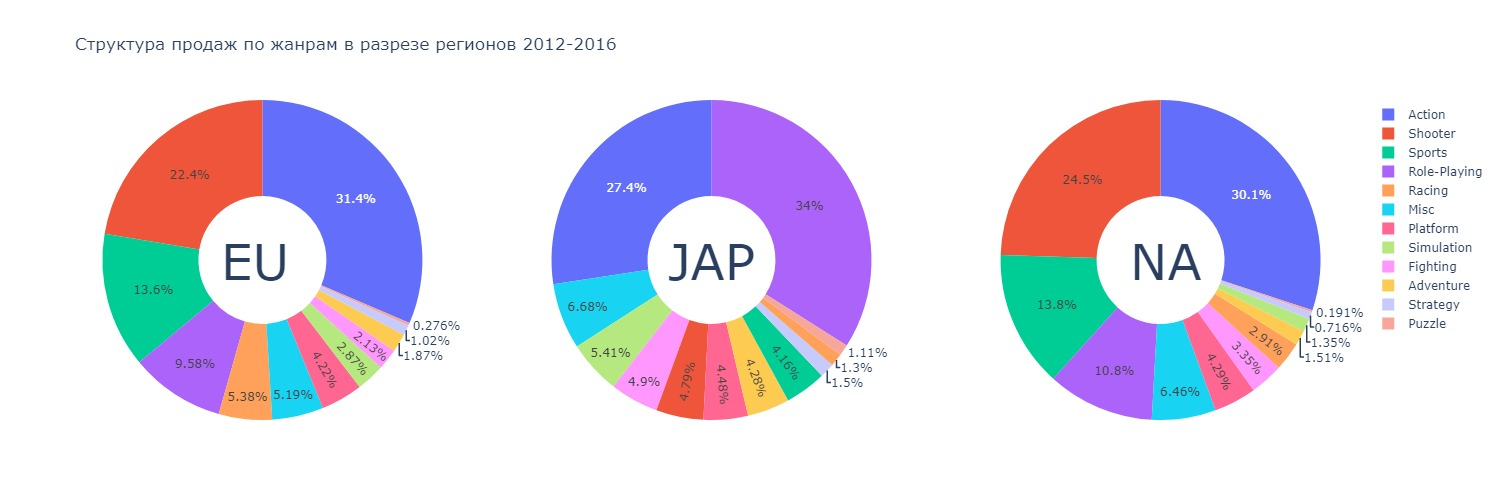

In [31]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]])
fig.add_trace(go.Pie(
     values=reg_pop_genre_sales['eu_sales'],
     labels=reg_pop_genre_sales['genre'],
     domain=dict(x=[0, 0.5]),
     name="Структура продаж в разбивке по жанрам Евро"), 
     row=1, col=1)

fig.add_trace(go.Pie(
    values=reg_pop_genre_sales['jp_sales'],
    labels=reg_pop_genre_sales['genre'], 
    domain=dict(x=[0.5, 1.0]),
    name="Структура продаж в разбивке по жанрам Япон"),
    row=1, col=2)
fig.add_trace(go.Pie(
    values=reg_pop_genre_sales['na_sales'],
    labels=reg_pop_genre_sales['genre'], 
    domain=dict(x=[0.5, 1.0]),
    name="Структура продаж в разбивке по жанрам Сев Амер"),
    row=1, col=3)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(width=1500, height=500,
    title_text="Структура продаж по жанрам в разрезе регионов 2012-2016",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='EU', x=0.11, y=0.5, font_size=50, showarrow=False),
                 dict(text='JAP', x=0.50, y=0.5, font_size=50, showarrow=False),
                 dict(text='NA', x=0.89, y=0.5, font_size=50, showarrow=False)])
fig.show('jpeg')

**Вывод:** У европейцев  и американцев по жанрам видеоигр предпочтения плюс/минус одинаковые. Жанры TOП-3 сформированы в следующем порядке: Action, Shooter, Sport занимают основную долю рынка 2/3. В отличие от Японии, где ТОП-3 выглядит RPG, Action, Misc. RPG является самым популярным жанром в Японии и составляет 34 %

### Анализ популярных игровых платформ

In [32]:
reg_pop_platform_sales = data.query('year_of_release >= 2012').pivot_table(index ='platform', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').reset_index()
reg_pop_platform_sales.style.background_gradient(axis=0,cmap='YlGn', subset =[ 'eu_sales','jp_sales','na_sales'])

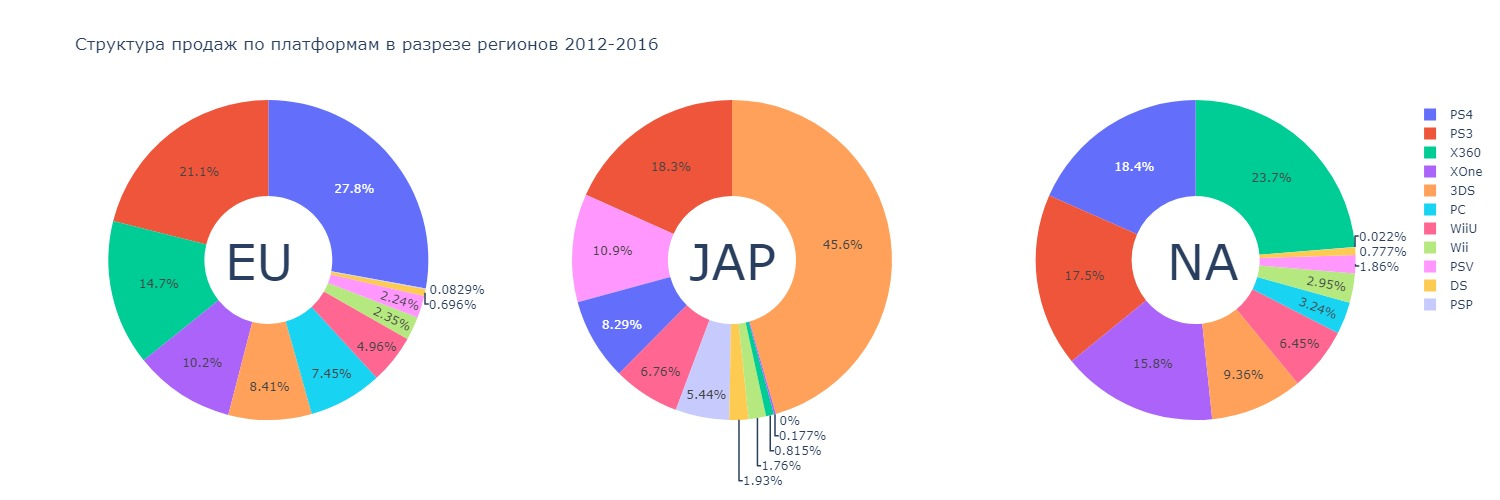

In [33]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]])
fig.add_trace(go.Pie(
     values=reg_pop_platform_sales['eu_sales'],
     labels=reg_pop_platform_sales['platform'],
     domain=dict(x=[0, 0.5]),
     name="Структура продаж в разбивке по платформам Евро"), 
     row=1, col=1)

fig.add_trace(go.Pie(
    values=reg_pop_platform_sales['jp_sales'],
    labels=reg_pop_platform_sales['platform'], 
    domain=dict(x=[0.5, 1.0]),
    name="Структура продаж в разбивке по платформам Япон"),
    row=1, col=2)
fig.add_trace(go.Pie(
    values=reg_pop_platform_sales['na_sales'],
    labels=reg_pop_platform_sales['platform'], 
    domain=dict(x=[0.5, 1.0]),
    name="Структура продаж в разбивке по платформам Сев Амер"),
    row=1, col=3)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout( width=1500, height=500,
    title_text="Структура продаж по платформам в разрезе регионов 2012-2016",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='EU', x=0.11, y=0.5, font_size=50, showarrow=False),
                 dict(text='JAP', x=0.50, y=0.5, font_size=50, showarrow=False),
                 dict(text='NA', x=0.89, y=0.5, font_size=50, showarrow=False)])
fig.show('jpeg')

**Выводы:** В Европе  половину рынка  занимает компания Sony с их консолью PlayStation четвертого и третьего поколения, далее компания Майкрософт с их поколениями Xbox. В Японии предпочтения были отданы портативной игровой платформа 3DS от компании Nintendo - 45% рынка и это внушительно. Все остальное в Японии забирает Sony с их консолью PlayStation различных модификаций и поколений. В Северной Америке наиболее крепкие позиции у компании Майкрософт с их xBox360, далее PS4 и PS3 и снова Майкрософт с их XOne, В целом, у Северо-Американцев предпочтения одинаковые, как и у Европейцев.

### Оценка влияния рейтинга ESRB на продажи в регионах 2012-2016

In [34]:
def rating_esbr(rating):

    if rating == "E":
        return 'Для всех'
    elif rating == "M":
        return 'Для взрослых'
    elif rating == "T":
        return 'Подростки'
    elif rating == "E10+":
        return 'Для всех от 10 лет и старше'
    elif rating == "K-A":
        return 'Для детей и взрослых'
    elif rating == "AO":
        return 'Только для взрослых'
    elif rating == "EC":            
        return 'Для детей младшего возраста'
    elif rating == "RP":
        return 'Рейтинг ожидается'
    elif  rating != rating:
        return 'Рейтинг не определен'# NAN - классифицирован, как рейтинг не определен.


In [35]:
data['rating_esrb_translate'] = data['rating'].apply(rating_esbr)

In [36]:
esrb_reg_sales = data.query('year_of_release>=2012').pivot_table(index='rating_esrb_translate', values = ['na_sales','eu_sales','jp_sales'], aggfunc='sum')
esrb_reg_sales = esrb_reg_sales.assign(NA_percent =lambda x: x['na_sales']/x['na_sales'].sum(),
                      EU_percent=lambda x: x['eu_sales']/x['eu_sales'].sum(),
                      JAP_percent =lambda x: x['jp_sales']/x['jp_sales'].sum()
                     )
esrb_reg_sales[['NA_percent','EU_percent','JAP_percent']].style.background_gradient(axis=0,cmap='YlGn', subset =[ 'NA_percent','EU_percent','JAP_percent']).format('{:.2%}')

**Вывод:** Структура продаж по рейтингу ESRB показывает определенные различия в основных рынках продаж видеоигр. Европейцы и Американцы очень похожи в своих предпочтениях, их структуры идентичны. Игры для взрослых в Европе и Северной Америке занимают почти 40% рынка, в отличии от рынка Японии, там популярность таких игр в 3,5 раза ниже. У Японии структура продажи игр в большенстве случаев (более 56 %), что рейтинг не определен.

## Проверка гипотез

### Проверим первую гипотезу

- Основная гипотеза(H0) - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;.
- Альтернативная гипотеза (H1) - Средние пользовательские рейтинги платформ Xbox One и PC не равны.
- Примем или отвергнем основное предположение. Ограничем долю ошибок первого рода, возьмем alpha= 0,05

In [37]:
sample_1 = data.query('platform in ["PC"] and year_of_release>=2012')[['user_score']].replace('tbd',np.nan).dropna().astype('float')
sample_2 = data.query('platform in ["XOne"] and year_of_release>=2012')[['user_score']].replace('tbd',np.nan).dropna().astype('float')

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [0.55350805]
Не получилось отвергнуть нулевую гипотезу


### Проверим вторую гипотезу

- Основная гипотеза(H0) - средние пользовательские рейтинги жанров Action и Sports разные. 
- Альтернативная гипотеза (H1) - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
- Примем или отвергнем основное предположение Ограничем долю ошибок первого рода, возьмем alpha= 0,05

In [38]:
sample_1 = data.query('genre in ["Action"] and year_of_release>=2012')[['user_score']].replace('tbd',np.nan).dropna().astype('float')
sample_2 = data.query('genre in ["Sports"] and year_of_release>=2012')[['user_score']].replace('tbd',np.nan).dropna().astype('float')

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [3.71630895e-26]
Отвергаем нулевую гипотезу


# Вывод

По результатам оценки рынка видеоигр, можно сделать вывод, что:

1.	Японский(JAP) рынок сильно отличен от рынка Европы и Северной Америки. К примеру,  в Японии жанр РПГ это жанр первой  руки, в то время как в EU и NA это четвертая рука. Игры в жанре Action во всем мире занимают около 30 % — это беспроигрышный вариант дистрибуции.
2.	 JAP предпочитает мобильные платформы для игр, их в структуре продаж 45% за 2011-2016 года, в  отличие EU и NA, где PSP от Sony  и Xbox  от Microsoft, занимают доминирующие позиции 2/3  в рынке платформ для игр. Если в будущем будут появляться прочие мобильные платформы на рынке, то в Японии можно сфокусировать продажи для этих платформ.
3.	Оценка критиков также оказывает влияет на продажу игр, в целом, чем выше оценка, тем выше уровень продаж, линейная зависимость слабоватая, но она есть, больше отмечается нелинейная зависимость . Хорошие продажи ожидают после среднего балла 6. Хотя и без рейтинга игры тоже продаеются.
4.	Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые отвергнуть не удалось.
5.	Гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные отвергаем.

Предложение:
Изучить маркетологам отчет. При планировании рекламной кампании учесть особенности рынков, кому-что интереснее, учесть емкость рынков в платформах и жанрах. Принять во внимание оценки критиков, выбрать целевую возрастную аудиторию.
